# installed libraries

In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=a531cf79a79eb2ab02c07a5e6b0ee2a6655a9baf1f07ec21ff0740fa6fd2a231
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


# imports

In [ ]:
import face_recognition
import imageio
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# 1 Label

# function

In [ ]:
class faceDetect:

  def __init__ (self, user_image, user_label):

    face_1 = face_recognition.load_image_file(user_image)
    face_1_encoding = face_recognition.face_encodings(face_1)[0]

    self.known_face_encodings = [face_1_encoding]

    self.known_face_names = [user_label]

  def predict(self, pred_user_image):

    file_name = pred_user_image

    unknown_image = face_recognition.load_image_file(file_name)

    unknown_image_to_draw = cv2.imread(file_name)

    face_locations = face_recognition.face_locations(unknown_image)
    face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

    for (top,right, bottom, left), face_encoding in zip(face_locations, face_encodings):

      matches = face_recognition.compare_faces(self.known_face_encodings, face_encoding)

      name = "Unknown"

      face_distances = face_recognition.face_distance(self.known_face_encodings, face_encoding)
      best_match_index = np.argmin(face_distances)

      if matches[best_match_index]:

        name = self.known_face_names[best_match_index]
      cv2.rectangle(unknown_image_to_draw, (left, top), (right, bottom),(0,255,0),3)
      cv2.putText(unknown_image_to_draw,name, (left, top-20), cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2, cv2.LINE_AA)

    cv2_imshow(unknown_image_to_draw)


# get and show labeled image

hamid


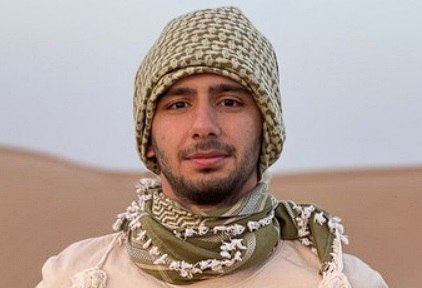

In [ ]:
user_image = "hamid.jpg"
user_label = "hamid"
img = cv2.imread(user_image)
print(user_label)
cv2_imshow(img)

# Prediction Image

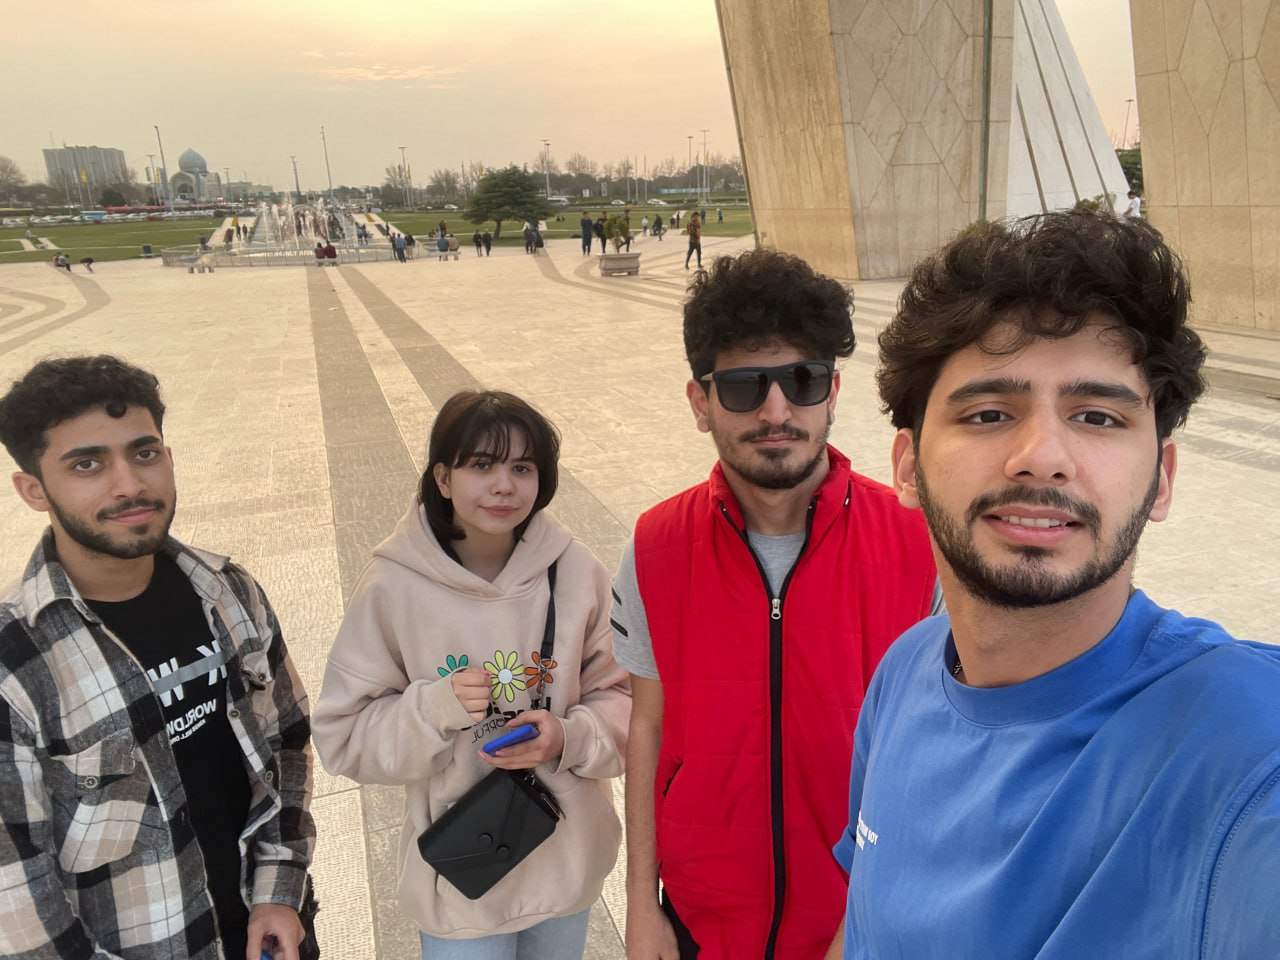

In [ ]:
pred_user_image = "group-mahmud.jpg"
predict_img= cv2.imread(pred_user_image)
cv2_imshow(predict_img)

# Predicted Image

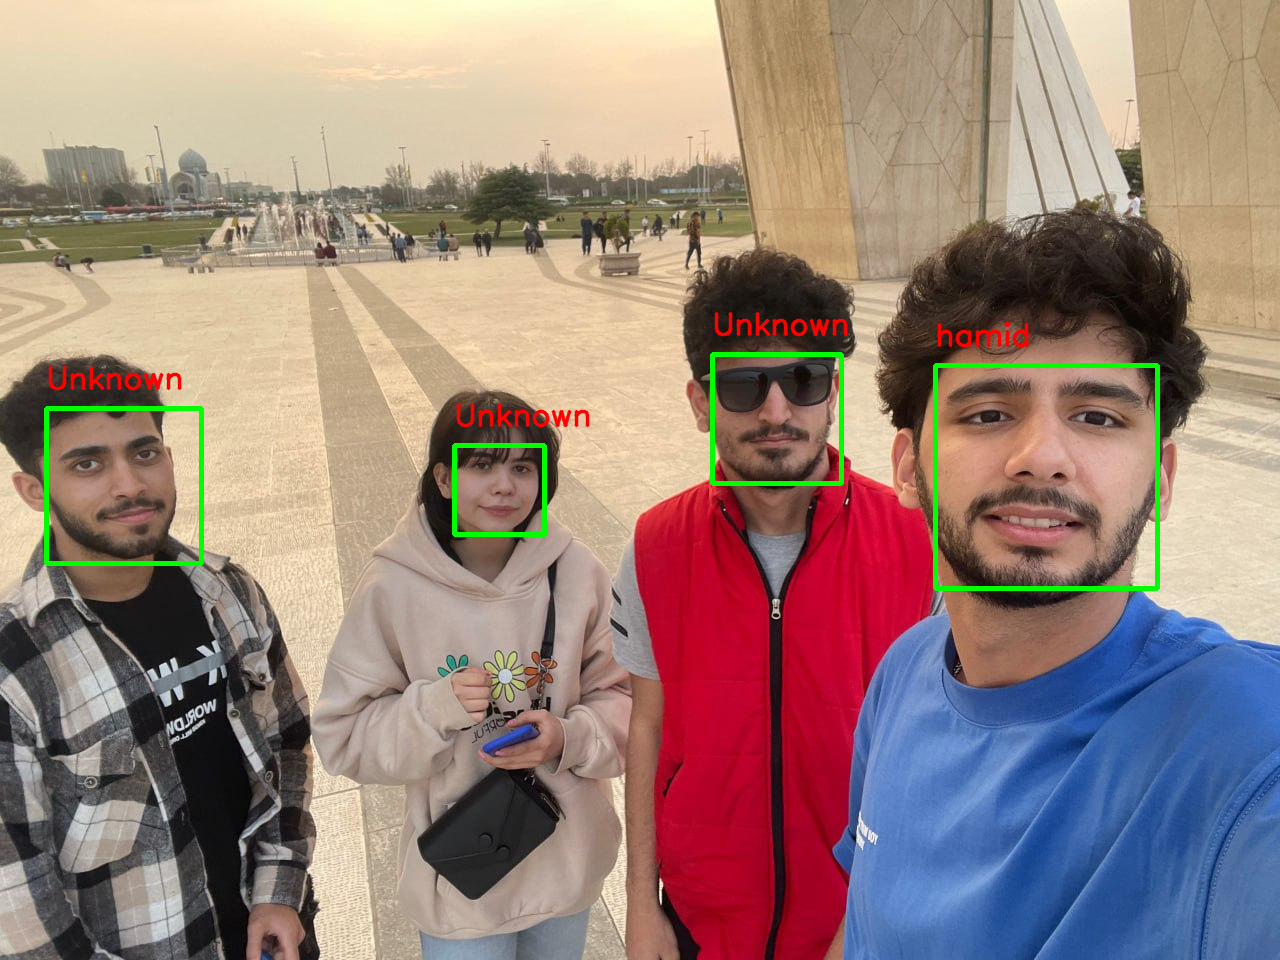

In [ ]:
pred_user_image = "group-mahmud.jpg"
model = faceDetect(user_image, user_label)
model.predict(pred_user_image)

# Multi Label

# function

In [ ]:
class faceDetectMulti:
    def __init__(self, user_images, user_labels):
        self.known_face_encodings = []
        self.known_face_names = []

        # Load each user image and encode the faces
        for user_image in user_images:
            face_image = face_recognition.load_image_file(user_image)
            face_encoding = face_recognition.face_encodings(face_image)[0]
            self.known_face_encodings.append(face_encoding)

        self.known_face_names = user_labels

    def predict(self, pred_user_image):
        file_name = pred_user_image
        unknown_image = face_recognition.load_image_file(file_name)
        unknown_image_to_draw = cv2.imread(file_name)

        face_locations = face_recognition.face_locations(unknown_image)
        face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

        for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
            matches = face_recognition.compare_faces(self.known_face_encodings, face_encoding)
            name = "Unknown"

            # Measure face distance to find the best match
            face_distances = face_recognition.face_distance(self.known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)

            if matches[best_match_index]:
                name = self.known_face_names[best_match_index]

            # Draw a rectangle around the face and label it
            cv2.rectangle(unknown_image_to_draw, (left, top), (right, bottom), (0, 255, 0), 3)
            cv2.putText(unknown_image_to_draw, name, (left, top - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

        cv2_imshow(unknown_image_to_draw)


# get and show labeled images

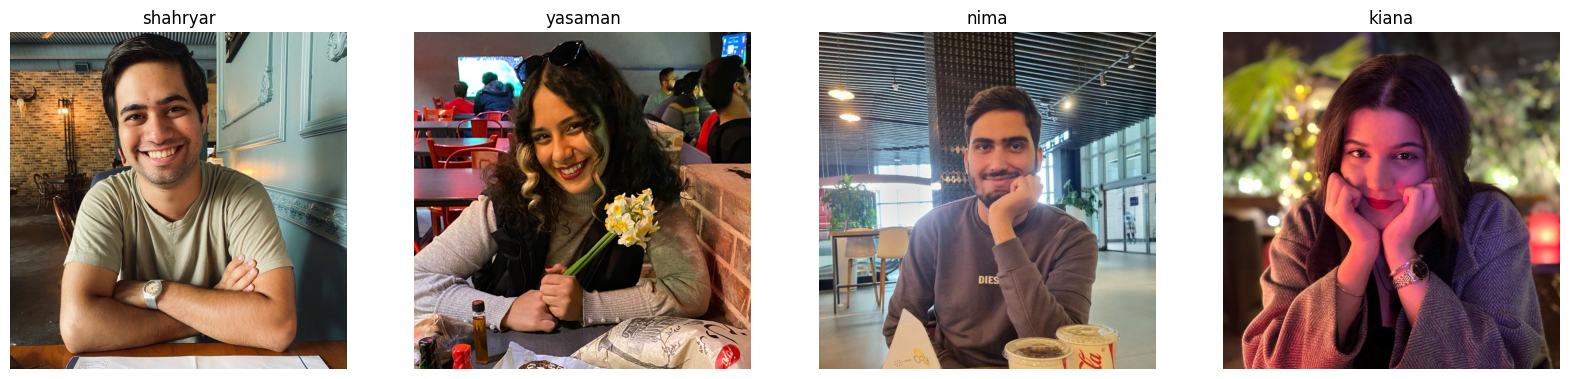

In [ ]:
from matplotlib import pyplot as plt
# List of image file paths
user_images = [
    'shahryar.jpg',
    'yasaman.jpg',
    'nima.jpg',
    'kiana.jpg'
]

# Corresponding labels for each person
user_labels = [
    'shahryar',
    'yasaman',
    'nima',
    'kiana'
]

# Setting up the figure size and grid for images
plt.figure(figsize=(20, 10))  # Adjust the size as per your requirement

# Loop through each image file
for index, image_path in enumerate(user_images):
    # Read the image from the file
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB format for correct color rendering in matplotlib

    # Add a subplot for each image; subplot indices start at 1
    plt.subplot(1, len(user_images), index + 1)
    plt.imshow(img)
    plt.title(user_labels[index])
    plt.axis('off')  # Turn off axis labels

# Show all the images side by side
plt.show()


# Prediction Image

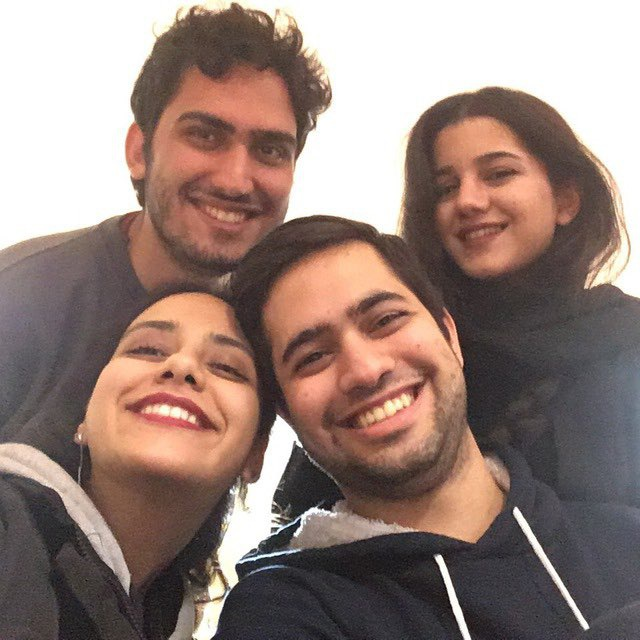

In [ ]:
pred_user_image = "shahryar-group.jpg"
predict_img= cv2.imread(pred_user_image)
cv2_imshow(predict_img)

# Predicted Image

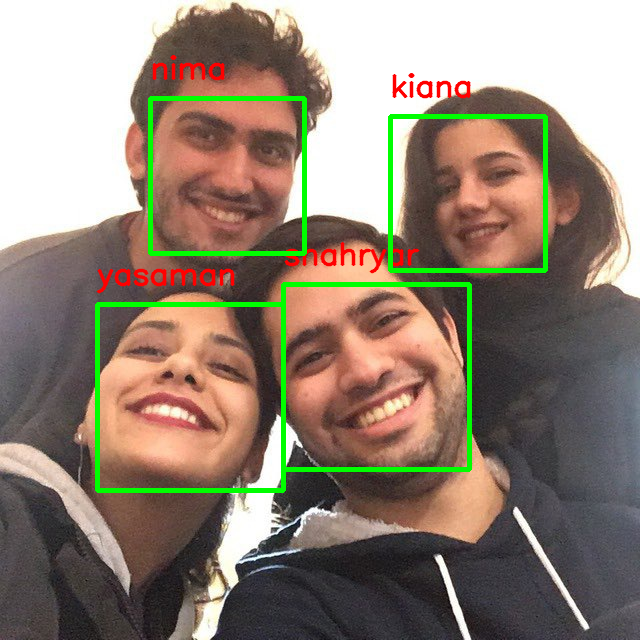

In [ ]:
detector = faceDetectMulti(user_images, user_labels)
detector.predict('shahryar-group.jpg')

# From webcam

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# JavaScript to capture a photo from webcam
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);
        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
        await new Promise((resolve) => capture.onclick = resolve);
        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

class faceDetect:
    def __init__(self, user_image, user_label):
        face_1 = face_recognition.load_image_file(user_image)
        face_1_encoding = face_recognition.face_encodings(face_1)[0]
        self.known_face_encodings = [face_1_encoding]
        self.known_face_names = [user_label]

    def predict(self, pred_user_image):
        unknown_image = face_recognition.load_image_file(pred_user_image)
        unknown_image_to_draw = cv2.imread(pred_user_image)
        face_locations = face_recognition.face_locations(unknown_image)
        face_encodings = face_recognition.face_encodings(unknown_image, face_locations)
        for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
            matches = face_recognition.compare_faces(self.known_face_encodings, face_encoding)
            name = "Unknown"
            face_distances = face_recognition.face_distance(self.known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = self.known_face_names[best_match_index]
            cv2.rectangle(unknown_image_to_draw, (left, top), (right, bottom), (0, 255, 0), 3)
            cv2.putText(unknown_image_to_draw, name, (left, top - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
        cv2_imshow(unknown_image_to_draw)


# Get reference image from webcam

<IPython.core.display.Javascript object>

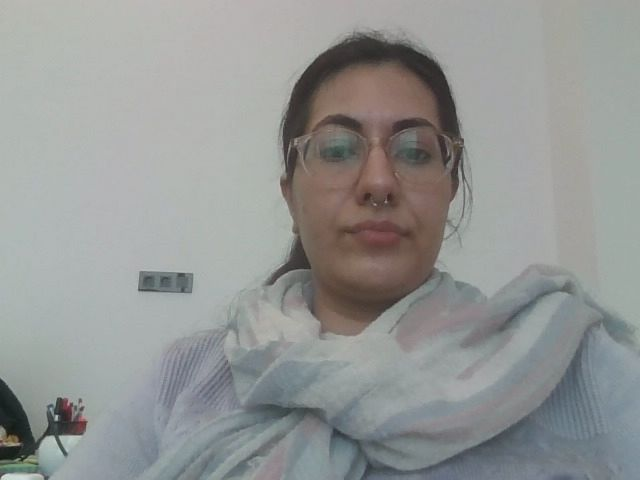

In [ ]:
user_image=take_photo()
img = cv2.imread(user_image)
cv2_imshow(img)

# Label Reference Image

In [ ]:
user_label = "neda"
model = faceDetect(user_image, user_label)

# Get Prediction Image From Webcam

<IPython.core.display.Javascript object>

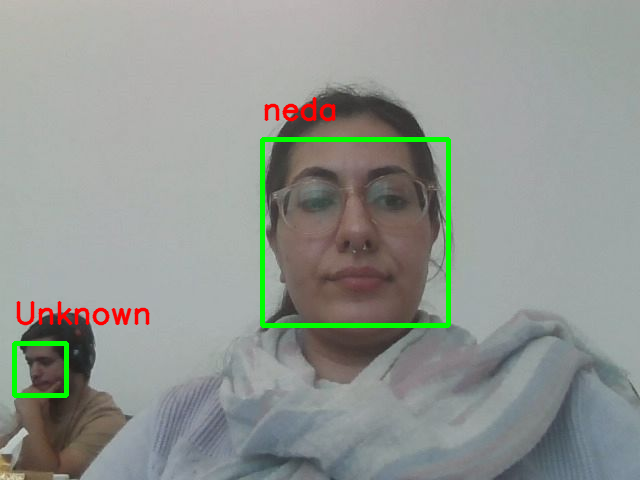

In [ ]:
captured_image = take_photo()  # Take a photo from the webcam
model.predict(captured_image)